In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import requests

from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

plt.style.use('bmh')

In [5]:
'''
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XMR&start=1546300800&end=1546646400&period=14400
'''

'\nhttps://poloniex.com/public?command=returnChartData&currencyPair=BTC_XMR&start=1546300800&end=1546646400&period=14400\n'

In [7]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400')
ret

<Response [200]>

In [8]:
js = ret.json()
# js

[{'date': '1634515200000',
  'high': '62640.61',
  'low': '59929.11',
  'open': '61553.50',
  'close': '62024.61',
  'volume': '479.929084',
  'quoteVolume': '29570552.47',
  'weightedAverage': '61614.42'},
 {'date': '1634601600000',
  'high': '64444.44',
  'low': '61405.16',
  'open': '62013.77',
  'close': '64256.73',
  'volume': '615.62446',
  'quoteVolume': '38674999.08',
  'weightedAverage': '62822.38'},
 {'date': '1634688000000',
  'high': '67190.00',
  'low': '63537.39',
  'open': '64280.55',
  'close': '66013.00',
  'volume': '633.745186',
  'quoteVolume': '41542144.75',
  'weightedAverage': '65550.23'},
 {'date': '1634774400000',
  'high': '66635.35',
  'low': '62039.33',
  'open': '66001.66',
  'close': '62198.17',
  'volume': '1052.825061',
  'quoteVolume': '67630667.75',
  'weightedAverage': '64237.32'},
 {'date': '1634860800000',
  'high': '63720.51',
  'low': '60035.46',
  'open': '62183.58',
  'close': '60688.18',
  'volume': '626.017527',
  'quoteVolume': '38690825.93',

In [10]:
df = pd.DataFrame(js)
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1634515200000,62640.61,59929.11,61553.50,62024.61,479.929084,29570552.47,61614.42
1,1634601600000,64444.44,61405.16,62013.77,64256.73,615.62446,38674999.08,62822.38
2,1634688000000,67190.00,63537.39,64280.55,66013.00,633.745186,41542144.75,65550.23
3,1634774400000,66635.35,62039.33,66001.66,62198.17,1052.825061,67630667.75,64237.32
4,1634860800000,63720.51,60035.46,62183.58,60688.18,626.017527,38690825.93,61804.7


In [11]:
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1634515200000,62640.61,59929.11,61553.50,0.893722,479.929084,29570552.47,61614.42
1,1634601600000,64444.44,61405.16,62013.77,0.936859,615.62446,38674999.08,62822.38
2,1634688000000,67190.00,63537.39,64280.55,0.970800,633.745186,41542144.75,65550.23
3,1634774400000,66635.35,62039.33,66001.66,0.897076,1052.825061,67630667.75,64237.32
4,1634860800000,63720.51,60035.46,62183.58,0.867894,626.017527,38690825.93,61804.7


In [14]:
price = df['close'].values.tolist()
# price

In [16]:
window_size = 5
X = []
Y = []

for i in range(len(price)-window_size):
    # i = 0
    # j = 0, 1, 2, 3, 4
    X.append([price[i + j] for j in range(window_size)])
    Y.append(price[window_size + i])

# print(X)
# print(Y)

X = np.asarray(X)
Y = np.asarray(Y)
# print(X)
# print(Y)
'''
X 10번째 값 87985563
[[0.89372162 0.93685889 0.97080003 0.89707579 0.86789418]
 [0.93685889 0.97080003 0.89707579 0.86789418 0.87985563]
 [0.97080003 0.89707579 0.86789418 0.87985563 0.87088252]
 ...
 [0.16246417 0.15767043 0.14309054 0.14256643 0.15037846]
 [0.15767043 0.14309054 0.14256643 0.15037846 0.14905349]
 [0.14309054 0.14256643 0.15037846 0.14905349 0.14217276]]
Y
[0.87985563 0.87088252 0.91394384 0.86060994 0.82390581 0.86599253
...
'''


[[0.89372162 0.93685889 0.97080003 0.89707579 0.86789418]
 [0.93685889 0.97080003 0.89707579 0.86789418 0.87985563]
 [0.97080003 0.89707579 0.86789418 0.87985563 0.87088252]
 ...
 [0.16246417 0.15767043 0.14309054 0.14256643 0.15037846]
 [0.15767043 0.14309054 0.14256643 0.15037846 0.14905349]
 [0.14309054 0.14256643 0.15037846 0.14905349 0.14217276]]
[0.87985563 0.87088252 0.91394384 0.86060994 0.82390581 0.86599253
 0.89786486 0.88988122 0.87961135 0.87294476 0.91659262 0.91042231
 0.88158528 0.87295404 0.88259756 0.91773708 1.         0.98853059
 0.9506329  0.94791339 0.93417166 0.93934109 0.96075589 0.9245463
 0.85666248 0.86143592 0.79459298 0.81710896 0.84868502 0.82809311
 0.78223323 0.80697031 0.79992822 0.83420563 0.73351045 0.75289567
 0.8019926  0.81166356 0.79408645 0.80038334 0.78683004 0.7330217
 0.645267   0.64942512 0.67023735 0.672821   0.67037649 0.61466206
 0.60650971 0.6490388  0.66275424 0.59815289 0.6299309  0.63952302
 0.61598877 0.58703443 0.60010266 0.59739764 

In [25]:
# X.shape # 원래 data 수 보다 훨씬 적음(1085개->495개)
# Y.shape

train_test_split = 400

X_train = X[:train_test_split, :]
y_train = Y[:train_test_split]
X_test = X[train_test_split:, :]
y_test = Y[train_test_split:]

X_train.shape
y_train.shape
X_test.shape
y_test.shape

(95,)

In [30]:
X_train[0]
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
# X_train[0]
# X_train.shape

X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))
X_test.shape

(95, 5, 1)

In [31]:
model = Sequential()
model.add(LSTM(128, input_shape=(5,1,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

2023-03-01 16:33:18.568819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-01 16:33:18.576281: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-01 16:33:18.576443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (master): /proc/driver/nvidia/version does not exist


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
400/400 [==============================] - 5s 4ms/step - loss: 0.0083
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0036
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0025
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 5/10
400/400 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 6/10
400/400 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 7/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 8/10
400/400 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 9/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 10/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0022


In [34]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


3/3 [==============================] - 0s 8ms/step


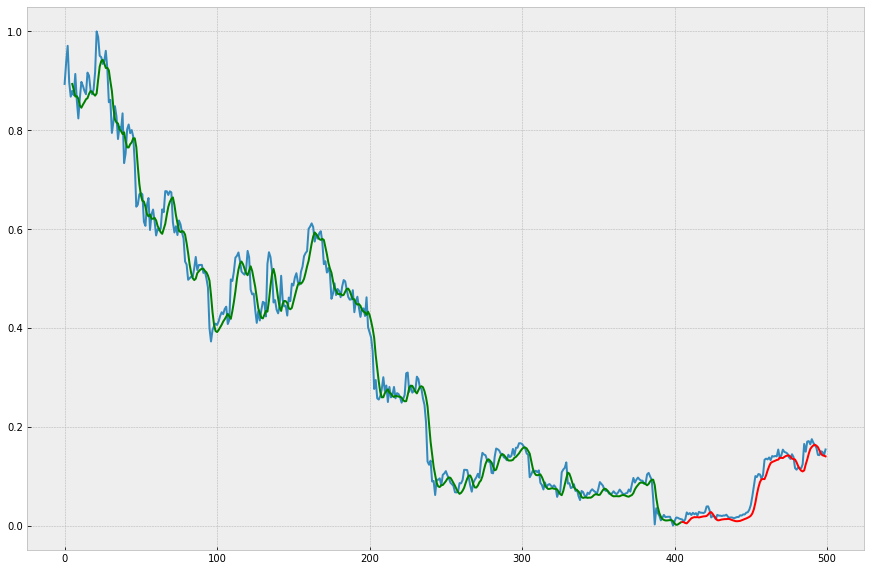

In [38]:
plt.figure(figsize=(15,10))
plt.plot(price)

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')
plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')

In [39]:
# x = plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')
# plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')

# matplot보다 좀 더 기능이 좋은 plotting 

trace1 = go.Scatter(x=np.arange(window_size, split_pt, 1), y=train_predict.reshape(400), mode='lines', name='train')
trace2 = go.Scatter(x=np.arange(split_pt, split_pt+len(test_predict), 1), y=test_predict.reshape(95), mode='lines', name='test')
trace3 = go.Scatter(x=np.arange(1, len(price), 1), y=price, mode='lines', name='price')

data  = [trace1, trace2, trace3]

py.offline.plot(data)

'temp-plot.html'